In [30]:
import h5py, os, nilearn
import matplotlib.pyplot as plt
import numpy as np
#from nilearn import input_data, datasets, plotting
from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import view_img_on_surf, view_img
from nltools.stats import isc, threshold, fdr, fisher_r_to_z, fisher_z_to_r
from tqdm import tqdm
import pandas as pd
import re

In [31]:
isc_result_folder_path = '../data/01_isc_results/'
files = sorted(os.listdir(isc_result_folder_path))
files[:3]

['isc_task-s01e01a.npy', 'isc_task-s01e01b.npy', 'isc_task-s01e02a.npy']

In [32]:
isc_results = []
for current_file in files:
    f_to_load = isc_result_folder_path + current_file
    isc_results.append(fisher_r_to_z(np.load(f_to_load)))

isc_results = np.asarray(isc_results)
isc_results.shape

avg_isc_results = fisher_z_to_r(np.mean(isc_results, axis = 0))
avg_isc_results.shape

(1000,)

### Plot

In [33]:
schaefer = nilearn.datasets.fetch_atlas_schaefer_2018(n_rois=1000, yeo_networks=7, resolution_mm=1, data_dir=None, base_url=None, resume=True, verbose=1)
schaefer_rois_file       = schaefer['maps']

# set up mask
mask = Brain_Data(schaefer['maps'])
mask_x = expand_mask(mask)

/Users/schmaelz/miniconda3/lib/python3.10/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


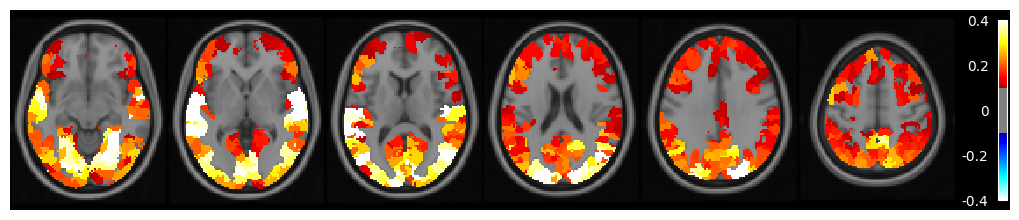

In [34]:
one_isc_result = avg_isc_results
one_isc_result.shape

isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
#result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

# visualize results
fig = plt.figure(figsize=(10, 2))
nilearn.plotting.plot_stat_map(    isc_r_brain, 
                                       bg_img       = '../data/MNI152_T1_2mm.nii.gz',
                                       threshold    = 0.1,  #additional threshold for visualization
                                       vmax         = 0.4, 
                                       draw_cross   = False,
                                       display_mode = 'z',
                                       cut_coords   = [ -10, 0, 10, 20, 30, 50],
                                       annotate     = False,
                                       figure = fig,
                                       title = '');

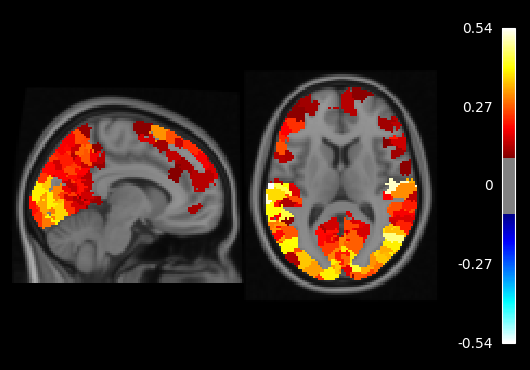

In [38]:
nilearn.plotting.plot_stat_map(isc_r_brain, 
                       bg_img       = '../data/MNI152_T1_2mm.nii.gz',
                       threshold    = 0.1,  #additional threshold for visualization
                       draw_cross=False, 
                       display_mode="xz", 
                       black_bg=True, 
                       annotate=False)
